<a href="https://colab.research.google.com/github/JoannaRaczek/Uczenie-maszynowe/blob/main/Udemy_Uczenie_maszynowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
auto = pd.read_csv("auto-mpg.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
X = auto.iloc[:,[1,2,4,5,6,7]]
y = auto.iloc[:, 0]
X.head()

,cylinders,displacement,weight,acceleration,model year,origin
0,8,307.0,3504,12.0,70,1
1,8,350.0,3693,11.5,70,1
2,8,318.0,3436,11.0,70,1
3,8,304.0,3433,12.0,70,1
4,8,302.0,3449,10.5,70,1


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X.to_numpy(),y)
lr.score(X.to_numpy(),y)

0.8205585866916345

In [ ]:
my_car1 = [4, 160, 190, 12, 90, 1]
my_car2 = [4, 200, 260, 15, 83, 1]
 
cars = [my_car1, my_car2]
lr.predict(cars)

array([52.23767295, 47.5274183 ])

# Nienadzorowane

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

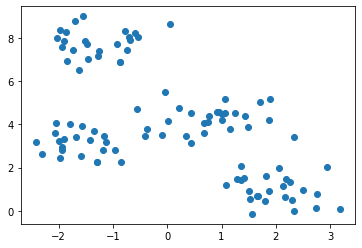

In [ ]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [ ]:
WCSS = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

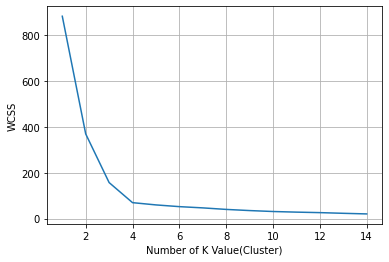

In [ ]:
plt.plot(range(1,15),WCSS)
plt.xlabel("Number of K Value(Cluster)")
plt.ylabel("WCSS")
plt.grid()

In [ ]:
kmeans =KMeans(n_clusters = 4 ,max_iter=300, random_state= 1)
clusters = kmeans.fit_predict(X) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Clustering')

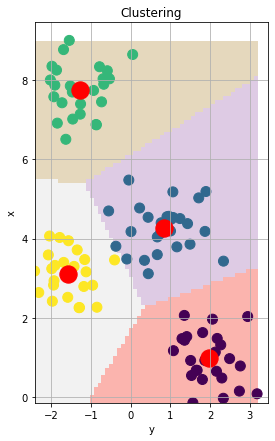

In [ ]:
h = 0.1
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
 
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, origin='lower')
 
plt.scatter(x=X[:,0], y=X[:,1], c=labels, s=100)
 
plt.scatter(x=centroids[:,0], y=centroids[:,1],s=300 , c='red')
 
plt.ylabel('x') , plt.xlabel('y')
plt.grid()
plt.title("Clustering")

# Rozdział 4

In [ ]:
# Loading common data related modules
import numpy as np
import pandas as pd
import math 
 
# Loading modelling algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor
 
# Loading tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score
 
# Loading visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 
# Configure visualisations 
%matplotlib inline
 
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')
 
#-----------------------------------------------------------------------------
# Read data
diamonds = pd.read_csv(r'C:\data\diamonds.csv')
 
#-----------------------------------------------------------------------------
# Review and clean the data (may be a repetitive task)
# remove unnecessary columns
diamonds.head()
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()
 
# review the data and get intuition about it
diamonds.shape
diamonds.info()
 
# find and eliminate nulls
diamonds.isnull().sum()
msno.matrix(diamonds, figsize=(10,4)) # just to visualize. no missing values.
 
# search for illogical values
diamonds.describe()
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]
# always check after execution
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
 
# Detect dependencies in the data
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
sns.pairplot(diamonds)
#
# check distribution
sns.kdeplot(diamonds['carat'], shade=True , color='r')
plt.hist(diamonds['carat'], bins=25)
#
# check correlation graph
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)
#
# analyze feature by feature, create hypotesis, try to find evidence
sns.factorplot(x='cut', data=diamonds , kind='count',aspect=1.5)
sns.factorplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=1.5)
#
sns.factorplot(x='color', data=diamonds , kind='count',aspect=1.5)
sns.factorplot(x='color', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)
#
# try to use different visualisation methods
sns.factorplot(x='clarity', data=diamonds , kind='count',aspect=1.5)
sns.factorplot(x='clarity', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)
#
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', 
          '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()
#
# try to find specific groups/classifications - repetitive process
sns.boxplot(x='clarity', y='price', data=diamonds)
#
plt.hist('depth' , data=diamonds , bins=25)
sns.jointplot(x='depth', y='price', data=diamonds, size=5)
#
sns.kdeplot(diamonds['table'] ,shade=True , color='orange')
sns.jointplot(x='table', y='price', data=diamonds , size=5)
 
#-----------------------------------------------------------------------------
# feature engineering - ananlyzing separately xyz doesn't make sense
sns.kdeplot(diamonds['x'] ,shade=True , color='r' )
sns.kdeplot(diamonds['y'] , shade=True , color='g' )
sns.kdeplot(diamonds['z'] , shade= True , color='b')
plt.xlim(2,10)
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()
#
plt.figure(figsize=(5,5))
plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)
#
sns.jointplot(x='volume', y='price' , data=diamonds, size=5)
#
diamonds.drop(['x','y','z'], axis=1, inplace= True)
diamonds.head()
#
# One hot encoding
diamonds = pd.get_dummies(diamonds, prefix_sep='_', drop_first=True)
diamonds.head()
 
#-----------------------------------------------------------------------------
# splitting data into features X, and labels y
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']
#
# splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=66)
 
#-----------------------------------------------------------------------------
# scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
 
 
#-----------------------------------------------------------------------------
# test different algorithms to get the data predictions 
scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
          'Ridge Regression', 'RandomForest Regression', 
          'KNeighbours Regression']
 
#-----------------------------------------------------------------------------
# Linear regression
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Linear Regression R2: {0:.2f}'.format(r2))
 
 
# Lasso
lasso = Lasso(normalize=True)
lasso.fit(X_train , y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Lasso Regression R2: {0:.2f}'.format(r2))
 
 
# Adaboost classifier
adaboost = AdaBoostRegressor(n_estimators=1000)
adaboost.fit(X_train , y_train)
y_pred = adaboost.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('AdaBoost Regression R2: {0:.2f}'.format(r2))
 
# Ridge
ridge = Ridge(normalize=True)
ridge.fit(X_train , y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Ridge Regression R2: {0:.2f}'.format(r2))
 
 
# Random forest
randomforest = RandomForestRegressor()
randomforest .fit(X_train , y_train)
y_pred = randomforest .predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Random Forest R2: {0:.2f}'.format(r2))
 
 
# K-Neighbours
kneighbours = KNeighborsRegressor()
kneighbours.fit(X_train , y_train)
y_pred = kneighbours.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('K-Neighbours Regression R2: {0:.2f}'.format(r2))
 
 
#-----------------------------------------------------------------------------
ranking = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : scores})
ranking = ranking.sort_values(by='R2-Scores' ,ascending=False)
ranking
 
sns.barplot(x='R2-Scores' , y='Algorithms' , data=ranking)
 


In [ ]:
import numpy as np
a = np.arange(20)
a.shape

(20,)

In [ ]:
print(a[4])
print(a[0])

4
0


In [ ]:
a = a.reshape((2,10))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [ ]:
print(a[0])
print(a[0][4])

[0 1 2 3 4 5 6 7 8 9]
4


In [ ]:
a = a.reshape((2,5,2))
a.shape

(2, 5, 2)

In [ ]:
print(a[0])
print(a[0][4])
print(a[0][4][1])

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[8 9]
9


In [ ]:
b = np.arange(0,40,2).reshape(4,5)
b

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [ ]:
a_python_list =  [2**x for x in range(10)]
c = np.array(a_python_list)
c

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [ ]:
zero_array = np.zeros(10)
zero_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
one_array = np.ones(10)
one_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
empty_array = np.empty(100)
empty_array

array([2.05015504e-316, 0.00000000e+000, 3.72031431e-321,             nan,
       1.12646967e-321, 0.00000000e+000, 7.37108455e-260, 1.38080600e+267,
       2.32162240e-152, 4.83245960e+276, 7.20881796e+159, 2.44045321e-152,
       4.81433624e+199, 1.06400250e+248, 9.33602100e+077, 1.14448054e+243,
       4.46811730e-091, 4.47593816e-091, 1.01813947e+277, 1.77921949e+248,
       1.02112630e-028, 1.05957293e+214, 6.01346953e-154, 1.27871133e-152,
       1.27967303e-152, 6.74018251e+199, 5.56111703e+180, 2.17374124e+068,
       4.83245960e+276, 2.32162240e-152, 2.99489130e+262, 7.62861449e+228,
       6.01347002e-154, 6.26526709e-085, 1.77459490e+248, 1.15314136e+214,
       1.69600982e+161, 2.78107099e+180, 4.78108711e+180, 9.29603063e+199,
       1.39487768e-258, 6.01347002e-154, 5.82147482e+180, 6.01346953e-154,
       2.52760136e-258, 4.47593804e-091, 6.01346953e-154, 4.70079799e+180,
       1.12547821e-153, 2.59345489e+161, 6.01347002e-154, 1.96086579e+243,
       6.92107984e+212, 7

In [ ]:
lucky_array = np.full((5,5),13)
lucky_array

array([[13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13]])

In [ ]:
diagonal_array = np.eye(5)
diagonal_array

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
random_array = np.random.random(10)
random_array

array([0.20347314, 0.4637265 , 0.46460283, 0.89448931, 0.71415044,
       0.8064697 , 0.99722159, 0.85944545, 0.39668412, 0.24427435])

In [ ]:
linspace_array = np.linspace(100, 200, 5)
linspace_array

array([100., 125., 150., 175., 200.])

# Lab 21 NumPy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
arr = np.arange(5,30, 2)
arr

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [ ]:
boolArr = arr[(arr % 3 == 0) & (arr < 20)]
boolArr

array([ 6,  9, 12, 15, 18])

In [ ]:
arr = np.arange(24).reshape((4,6))
arr

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [ ]:
arr[:,:-1]

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10],
       [12, 13, 14, 15, 16],
       [18, 19, 20, 21, 22]])

In [ ]:
arr = np.arange(50).reshape((10,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [ ]:
data = np.arange(500).reshape(100,5)

In [ ]:
split_level = 0.2
num_rows = data.shape[0]
split_border = int(split_level * num_rows)
split_border

20

In [ ]:
arr[:split_border,:]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
np.random.shuffle(arr)
arr[:split_border,:]

array([[ 5,  6,  7,  8,  9],
       [30, 31, 32, 33, 34]])

In [ ]:
np.random.shuffle(data)
X_learn = data[split_border:,:-1]
X_test  = data[:split_border,:-1]
y_learn = data[split_border:,-1]
y_test  = data[:split_border,-1]

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
        data[:, :-1], data[:, -1], test_size=0.2, shuffle = True)

# Lab 24

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.arange(1,26).reshape(5,5)
X

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [ ]:
Ones = np.ones((5,5))
Ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
Ones.dot(X)

array([[55., 60., 65., 70., 75.],
       [55., 60., 65., 70., 75.],
       [55., 60., 65., 70., 75.],
       [55., 60., 65., 70., 75.],
       [55., 60., 65., 70., 75.]])

In [ ]:
X.dot(Ones)

array([[ 15.,  15.,  15.,  15.,  15.],
       [ 40.,  40.,  40.,  40.,  40.],
       [ 65.,  65.,  65.,  65.,  65.],
       [ 90.,  90.,  90.,  90.,  90.],
       [115., 115., 115., 115., 115.]])

In [ ]:
diag = np.zeros((5,5))
np.fill_diagonal(diag, 1)
diag

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
diag.dot(X)

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [ ]:
np.where(X %2 == 0, X, X + 1)

array([[ 2,  2,  4,  4,  6],
       [ 6,  8,  8, 10, 10],
       [12, 12, 14, 14, 16],
       [16, 18, 18, 20, 20],
       [22, 22, 24, 24, 26]])

In [ ]:
X_bis = np.where(X > 10 , 2*X, 0)
np.count_nonzero(X_bis)

15

In [ ]:
x = np.array([[10,20,30], [40,50,60]])
y = np.array([[100], [200]])
np.append(x, y, axis = 1)

array([[ 10,  20,  30, 100],
       [ 40,  50,  60, 200]])

In [ ]:
np.append(x, x, axis = 0)

array([[10, 20, 30],
       [40, 50, 60],
       [10, 20, 30],
       [40, 50, 60]])

# Lab 26

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.arange(-25, 25).reshape((10,5))
X

array([[-25, -24, -23, -22, -21],
       [-20, -19, -18, -17, -16],
       [-15, -14, -13, -12, -11],
       [-10,  -9,  -8,  -7,  -6],
       [ -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24]])

In [ ]:
O = np.ones((X.shape[0], 1))
O

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X_1 = np.append(X, O, axis = 1)
X_1

array([[-25., -24., -23., -22., -21.,   1.],
       [-20., -19., -18., -17., -16.,   1.],
       [-15., -14., -13., -12., -11.,   1.],
       [-10.,  -9.,  -8.,  -7.,  -6.,   1.],
       [ -5.,  -4.,  -3.,  -2.,  -1.,   1.],
       [  0.,   1.,   2.,   3.,   4.,   1.],
       [  5.,   6.,   7.,   8.,   9.,   1.],
       [ 10.,  11.,  12.,  13.,  14.,   1.],
       [ 15.,  16.,  17.,  18.,  19.,   1.],
       [ 20.,  21.,  22.,  23.,  24.,   1.]])

In [ ]:
w = np.random.rand(X_1.shape[1])
w

array([0.08228526, 0.26266012, 0.79638734, 0.30212632, 0.41294425,
       0.20625228])

In [ ]:
def predict(x, w):
    total_stimulation = np.dot(x, w)
    if total_stimulation > 0:
        return 1
    else:
        return -1

In [ ]:
for i in X_1:
    print(predict(i, w))

-1
-1
-1
-1
-1
1
1
1
1
1


# Lab 28

In [ ]:
import numpy as np
X = np.arange(-25, 25, 1).reshape(10,5)
ones = np.ones((X.shape[0], 1))
X_1 = np.append(X.copy(), ones, axis=1)
w = np.random.rand(X_1.shape[1])

 
def predict(x, w):     
    total_stimulation = np.dot(x, w)       
    y_pred = 1 if total_stimulation > 0 else -1
    return y_pred
X_1       

array([[-25., -24., -23., -22., -21.,   1.],
       [-20., -19., -18., -17., -16.,   1.],
       [-15., -14., -13., -12., -11.,   1.],
       [-10.,  -9.,  -8.,  -7.,  -6.,   1.],
       [ -5.,  -4.,  -3.,  -2.,  -1.,   1.],
       [  0.,   1.,   2.,   3.,   4.,   1.],
       [  5.,   6.,   7.,   8.,   9.,   1.],
       [ 10.,  11.,  12.,  13.,  14.,   1.],
       [ 15.,  16.,  17.,  18.,  19.,   1.],
       [ 20.,  21.,  22.,  23.,  24.,   1.]])

In [ ]:
y = np.array([1, -1, -1, 1, -1, 1, -1, -1, 1, -1])
eta = 0.01

In [ ]:
epochs = 10
for i in range(epochs):
    for x, y_target in zip(X_1, y):
        y_pred = predict(x, w)
        delta_w = eta * (y_target - y_pred) * x
        w += delta_w
        print(w) 

[ 6.37455001  3.22816874 -0.91567665 -4.35657067 -8.35713955 -3.53458824]
[ 6.77455001  3.60816874 -0.55567665 -4.01657067 -8.03713955 -3.55458824]
[ 6.77455001  3.60816874 -0.55567665 -4.01657067 -8.03713955 -3.55458824]
[ 6.57455001  3.42816874 -0.71567665 -4.15657067 -8.15713955 -3.53458824]
[ 6.57455001  3.42816874 -0.71567665 -4.15657067 -8.15713955 -3.53458824]
[ 6.57455001  3.44816874 -0.67567665 -4.09657067 -8.07713955 -3.51458824]
[ 6.57455001  3.44816874 -0.67567665 -4.09657067 -8.07713955 -3.51458824]
[ 6.57455001  3.44816874 -0.67567665 -4.09657067 -8.07713955 -3.51458824]
[ 6.87455001  3.76816874 -0.33567665 -3.73657067 -7.69713955 -3.49458824]
[ 6.87455001  3.76816874 -0.33567665 -3.73657067 -7.69713955 -3.49458824]
[ 6.37455001  3.28816874 -0.79567665 -4.17657067 -8.11713955 -3.47458824]
[ 6.77455001  3.66816874 -0.43567665 -3.83657067 -7.79713955 -3.49458824]
[ 6.77455001  3.66816874 -0.43567665 -3.83657067 -7.79713955 -3.49458824]
[ 6.57455001  3.48816874 -0.59567665 -

# Lab 30

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50):
        
        self.eta = eta
        self.epochs = epochs
        
        
    def predict(self, x):
        
        total_stimulation = np.dot(x, self.w)       
        y_pred = 1 if total_stimulation > 0 else -1
        return y_pred
        
    
    def fit(self, X, y):
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            for x, y_target in zip(X_1,y):
            
                y_pred = self.predict(x)
                delta_w = self.eta * (y_target - y_pred) * x
                self.w += delta_w

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
        
    def predict(self, x):
        
        total_stimulation = np.dot(x, self.w)       
        y_pred = 1 if total_stimulation > 0 else -1
        return y_pred
        
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            number_of_errors = 0
            
            for x, y_target in zip(X_1,y):
            
                y_pred = self.predict(x)
                delta_w = self.eta * (y_target - y_pred) * x
                self.w += delta_w
                
                number_of_errors += 1 if y_target != y_pred else 0
                
            self.list_of_errors.append(number_of_errors)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, number of errors {}".format(
                        e, self.w, number_of_errors))
                
                
                
 
 

Epoch: 0, weights: [ 0.27462307 -0.36928365 -0.37434117  0.2012755 ], number of errors 4
Epoch: 1, weights: [-9.25376929e-01 -1.56928365e+00  2.56588263e-02  1.27549650e-03], number of errors 3
Epoch: 2, weights: [-0.92537693 -2.16928365  1.02565883  0.2012755 ], number of errors 5
Epoch: 3, weights: [-0.32537693 -2.36928365  0.62565883  0.4012755 ], number of errors 3
Epoch: 4, weights: [ 0.27462307 -2.56928365  0.22565883  0.6012755 ], number of errors 3
Epoch: 5, weights: [-0.12537693 -3.16928365  0.62565883  0.8012755 ], number of errors 3
Epoch: 6, weights: [ 0.47462307 -3.36928365  0.22565883  1.0012755 ], number of errors 3
Epoch: 7, weights: [ 0.47462307 -3.96928365  1.22565883  1.2012755 ], number of errors 5
Epoch: 8, weights: [ 1.07462307 -4.16928365  0.82565883  1.4012755 ], number of errors 3
Epoch: 9, weights: [ 1.67462307 -4.36928365  0.42565883  1.6012755 ], number of errors 3
Epoch: 10, weights: [ 1.27462307 -4.96928365  0.82565883  1.8012755 ], number of errors 3
Epoc

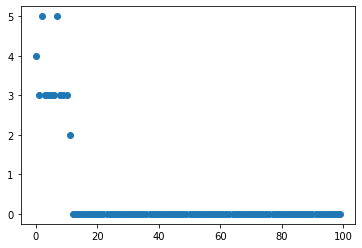

In [ ]:
X = np.array([
    [2, 4,  20],  # 2*2 - 4*4 + 20 =   8 > 0
    [4, 3, -10],  # 2*4 - 4*3 - 10 = -14 < 0
    [5, 6,  13],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5, 4,   8],  # 2*5 - 4*4 + 8 =    2 > 0
    [3, 4,   5],  # 2*3 - 4*4 + 5 =   -5 < 0 
    [3, 0,   -5],  # 2*3 - 0*4 - 5 =   -1 < 0 
    [1, 1,   -1],  # 2*1 - 4*1 - 1 =   -3 < 0 
    [1, -1,   -5],  # 2*1 - 4*1 - 1 =   1 > 0 
])
 
y = np.array([1, -1, -1, 1, -1, -1, -1, 1])
 
perceptron = Perceptron(eta=0.1, epochs=100, is_verbose=True)            
perceptron.fit(X, y)
 
print(perceptron.w)
 
print(perceptron.predict(np.array([[1, 2, 3, 1]])))  # 2*1 - 4*2 + 3 = -3 < 0
print(perceptron.predict(np.array([[2, 2, 8, 1]])))  # 2*2 - 4*2 + 8 =  4 > 0
print(perceptron.predict(np.array([[3, 3, 3, 1]])))  # 2*3 - 4*3 + 3 = -3 < 0
 
%matplotlib inline
 
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)


# Lab 32

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
 
num_iterations = 40
time_results_loop = []
 
for iteration in range(1, num_iterations+1):
    
    start_time = time.time()
    
    data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=float)
    data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=float)
    data3 = np.zeros(shape=(10*iteration, 10*iteration), dtype=float)
    for i in range(data1.shape[0]):
        for j in range(data1.shape[0]):
            data3[i,j] = sum([data1[i, v] * data2[v, j] for v in range(data1.shape[1])])
           
    end_time = time.time()
    
    print('{} - :{}'.format(iteration, end_time - start_time))    
    time_results_loop.append(end_time - start_time)

1 - :0.0011355876922607422
2 - :0.020873546600341797
3 - :0.04820823669433594
4 - :0.12374258041381836
5 - :0.24799680709838867
6 - :0.4650993347167969
7 - :0.6545968055725098
8 - :0.9283633232116699
9 - :1.2728209495544434
10 - :1.4037818908691406
11 - :1.1200158596038818
12 - :0.9848048686981201
13 - :1.0149040222167969
14 - :1.3730289936065674
15 - :1.628432273864746
16 - :1.945429801940918
17 - :4.310359954833984
18 - :2.6011929512023926
19 - :3.2120816707611084
20 - :3.8256893157958984
21 - :5.540989875793457
22 - :5.78722882270813
23 - :17.626273155212402
24 - :8.341901779174805
25 - :8.61234188079834
26 - :9.641369342803955
27 - :8.893425703048706
28 - :13.036139965057373
29 - :12.928668737411499
30 - :14.84301495552063
31 - :15.506844520568848
32 - :17.86854577064514
33 - :19.264556407928467


KeyboardInterrupt: ignored

In [ ]:
num_iterations = 33
time_results_np = []
 
for iteration in range(1, num_iterations+1):
 
    start_time = time.time()
    
    data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=float)
    data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=float)
    data3 = np.zeros(shape=(10*iteration, 10*iteration), dtype=float)
    data3 = data1.dot(data2)
    
    end_time = time.time()
    
    print('{} - :{}'.format(iteration, end_time - start_time))    
    time_results_np.append(end_time - start_time)

1 - :0.0001232624053955078
2 - :8.988380432128906e-05
3 - :9.298324584960938e-05
4 - :8.034706115722656e-05
5 - :0.00015783309936523438
6 - :0.00013017654418945312
7 - :0.010871171951293945
8 - :0.00046539306640625
9 - :0.0003933906555175781
10 - :0.0008785724639892578
11 - :0.0005576610565185547
12 - :0.0005490779876708984
13 - :0.0005478858947753906
14 - :0.0007174015045166016
15 - :0.0020799636840820312
16 - :0.0014729499816894531
17 - :0.002588033676147461
18 - :0.0006506443023681641
19 - :0.0007812976837158203
20 - :0.0008831024169921875
21 - :0.004821300506591797
22 - :0.001157522201538086
23 - :0.0011210441589355469
24 - :0.004773855209350586
25 - :0.0015511512756347656
26 - :0.0016291141510009766
27 - :0.006297588348388672
28 - :0.008725166320800781
29 - :0.0027570724487304688
30 - :0.002590179443359375
31 - :0.007380485534667969
32 - :0.0025980472564697266
33 - :0.006885051727294922


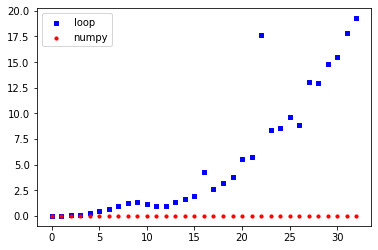

In [ ]:
fig = plt.figure()
plt.scatter(range(num_iterations), time_results_loop, s=10, c='b', marker="s", label='loop')
plt.scatter(range(num_iterations), time_results_np, s=10, c='r', marker="o", label='numpy')
plt.legend(loc='upper left');
plt.show()